In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# PROBLEM STATEMENT:TO PREDICT WHETHER PERSON MAKES OVERR $50k/YEAR OR NOT

In [4]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
df.shape

(32560, 15)

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
df.Capital_gain.unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [13]:
df.Capital_loss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [14]:
#no of unique values in dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [15]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

As we observe that '?' value in workclass have appeared 1836 times  
Lets replace this value with most frequent values


In [17]:
df[df ==' ?']=np.nan

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

Above 3 columns of occupation,workclass and country have "? values.  "
Lets handle them

In [21]:
for j in ['Native_country','Occupation','Workclass']:
    df[j].fillna(df[j].mode()[0], inplace=True)

In [22]:
#duplicate values
df.duplicated().sum()

24

In [23]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [24]:
df.Age.max()

90

In [25]:
df.Age.min()

17

SEPERATING CATEGORICAL AND NUMERICAL COLUMNS

In [26]:
cat=[]
num=[]
for i in df:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        num.append(i)
        
print(cat)
print(num)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# EDA-UNIVARIATE ANALYSIS

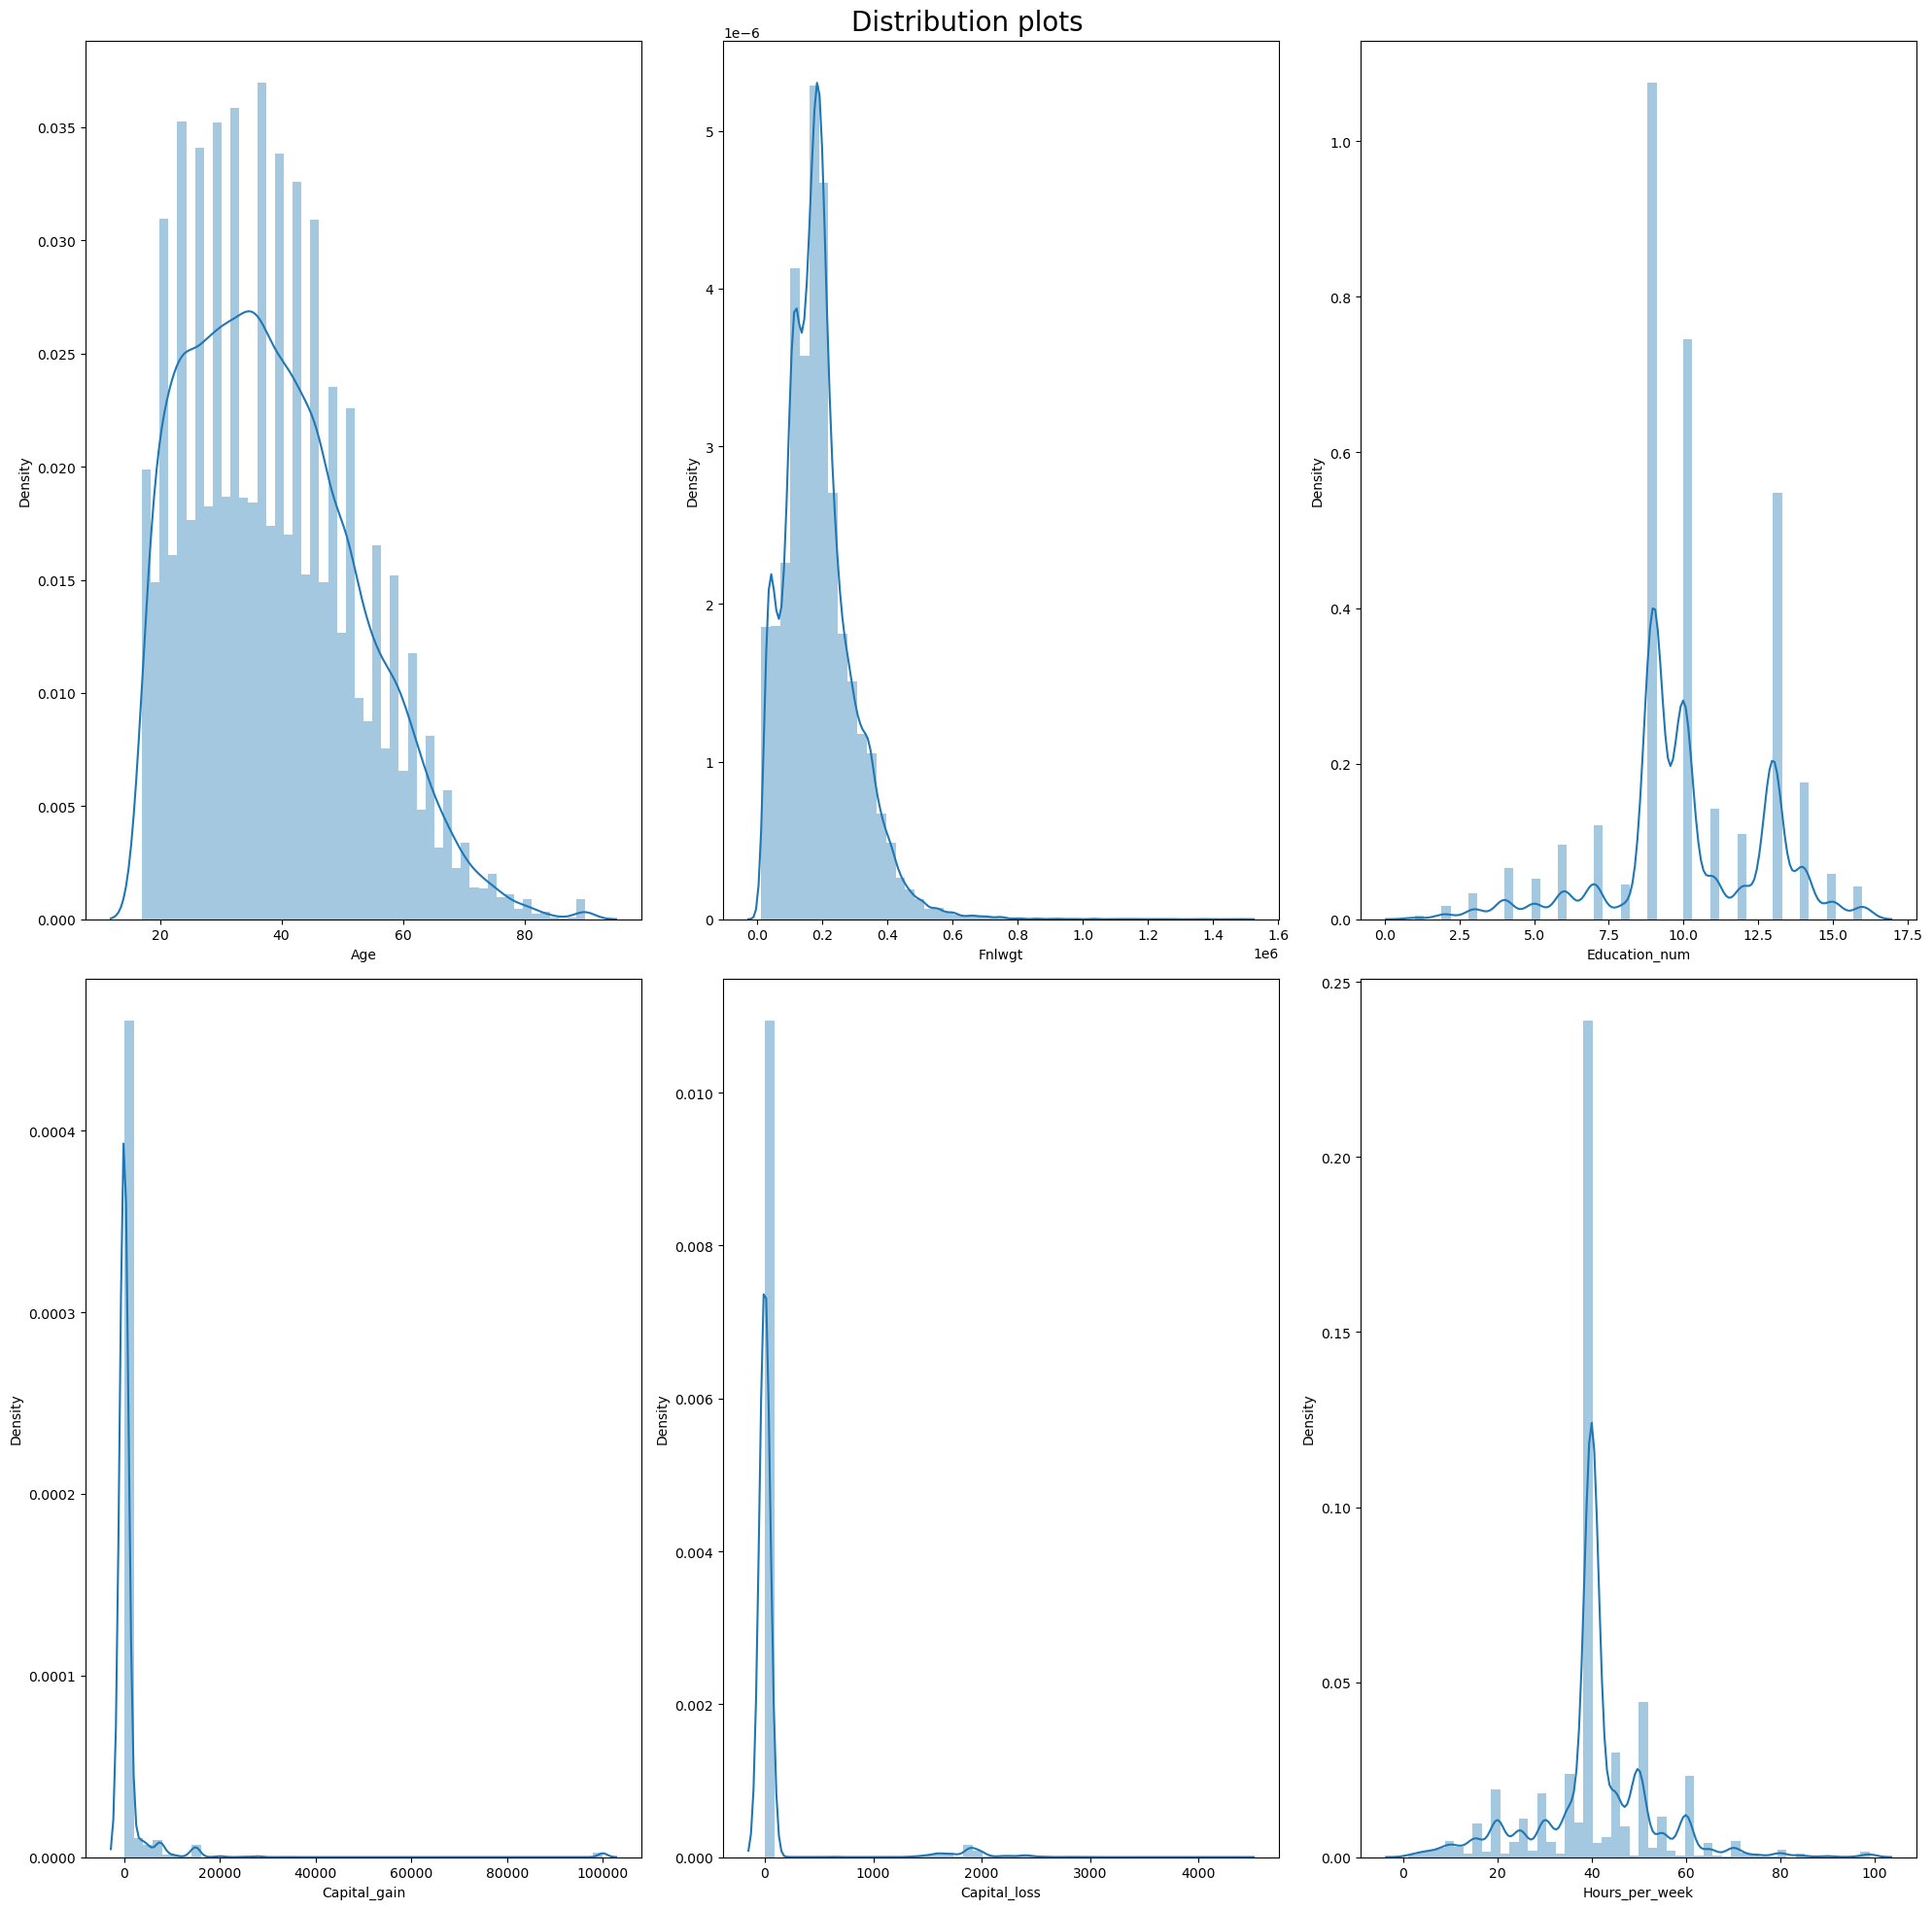

In [27]:
##Distplot for numerical data
plt.figure(figsize=(20,20))

p=1

for n in num:
    if p<=6:
        plt.subplot(2,3,p)
        sns.distplot(df[n])
        plt.xlabel(n)
    p+=1
plt.suptitle('Distribution plots',fontsize=20)
plt.tight_layout()
plt.show()

From above we make observation that Age is little bit right skewed  
Finalweight ,Capital gain and loss are highly right skewed  
Hours per week is assymetrical data distribution

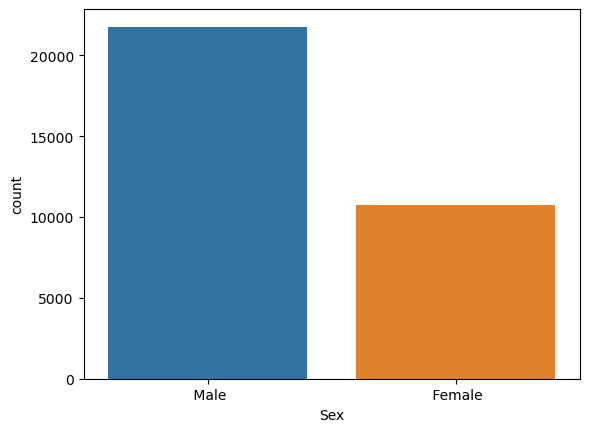

In [28]:
#Count plot for categorical columns

sns.countplot(data=df,x='Sex')
plt.show()

From above w eobserve that More Males are present in the homes as compared to females

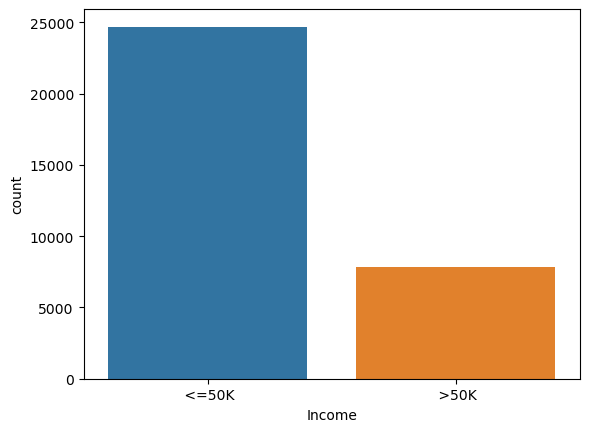

In [29]:
sns.countplot(data=df,x='Income')
plt.show()

There are more no of people whose income is less than 50K

In [30]:
def agegroup(a):
    a=int(a)
    if 17<a<31:
        return "18-30"
    elif 30<a<41:
        return "31-40"
    elif 40<a<51:
        return "41-50"
    elif 50<a<61:
        return "51-60"
    elif 60<a<81 :
        return "61-80"
    else  : 
        return "above 80"
    
df['agegroup']=df['Age'].apply(agegroup)

<Axes: xlabel='agegroup', ylabel='count'>

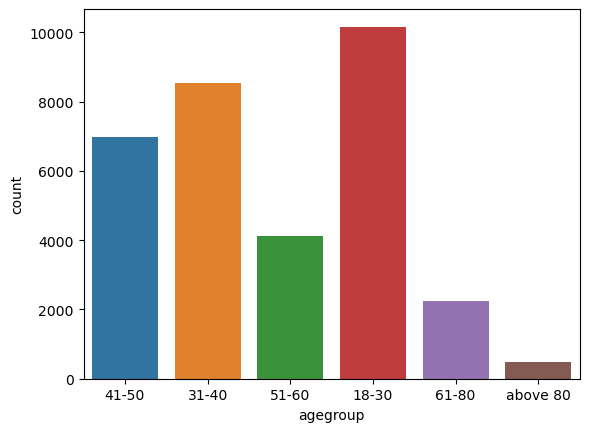

In [31]:
sns.countplot(data=df,x='agegroup')

From above we observe that peoplein homes are  highest between 18-30 age of group

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

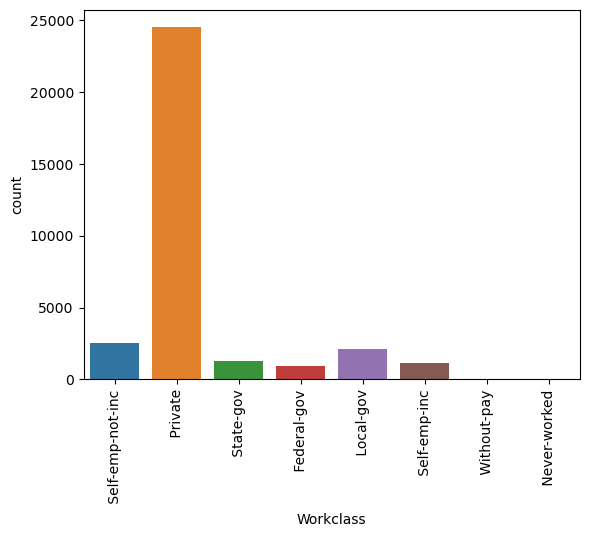

In [32]:
sns.countplot(data=df,x='Workclass')
plt.xticks(rotation=90)

There are more no of people working in the private companies followed by self-employed work

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

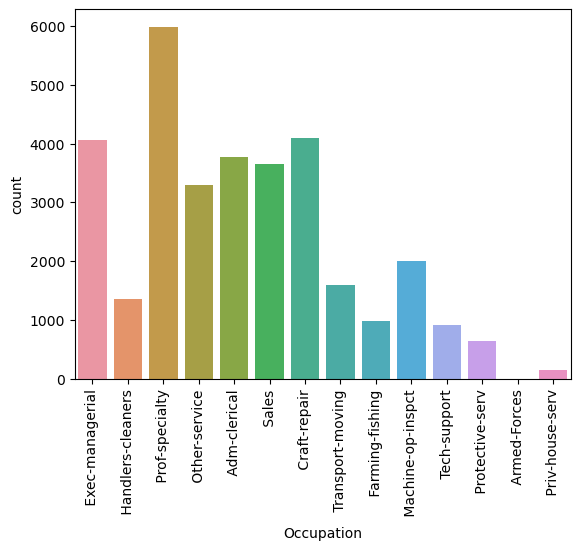

In [33]:
sns.countplot(data=df,x='Occupation')
plt.xticks(rotation=90)

Many people are working in prof-speciality

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

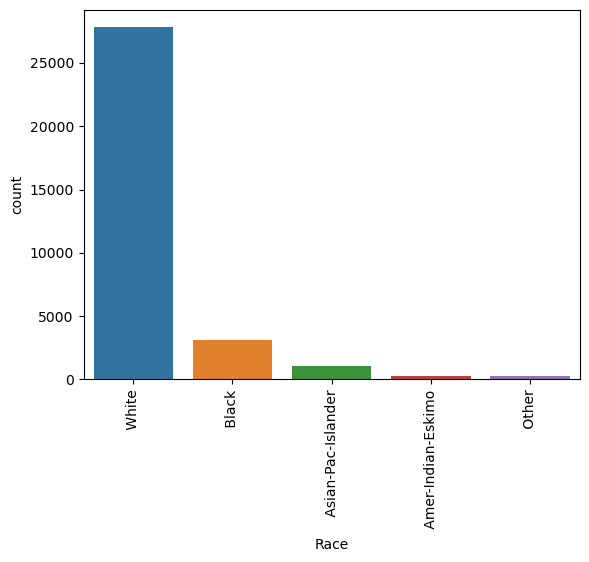

In [34]:
sns.countplot(data=df,x='Race')
plt.xticks(rotation=90)

More people are from white Race followed  by black Race

# BIAVRIATE ANALYSIS

<Axes: xlabel='agegroup', ylabel='count'>

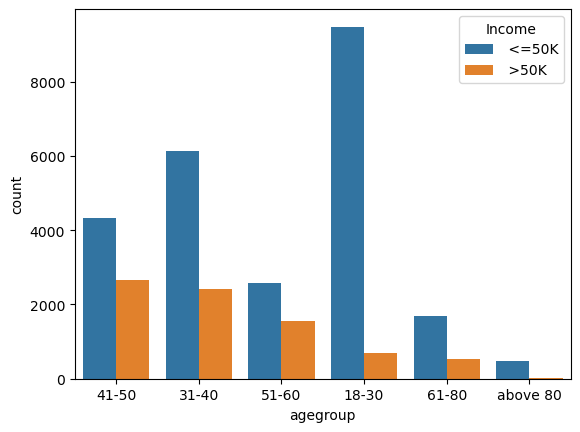

In [35]:
sns.countplot(x='agegroup',hue='Income',data=df)

As the agegroup of 18-30 is presnt highest,it also has the highest no of people having income<=50k
while people of age group 41-50,51-60 have more number of people earning >=50k

<Axes: xlabel='Sex', ylabel='count'>

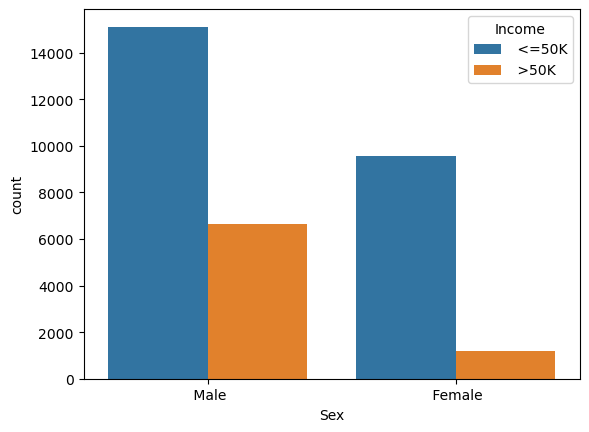

In [36]:
sns.countplot(x='Sex',hue='Income',data=df)

There are more Males earning more than 50 k income as compared to Females

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

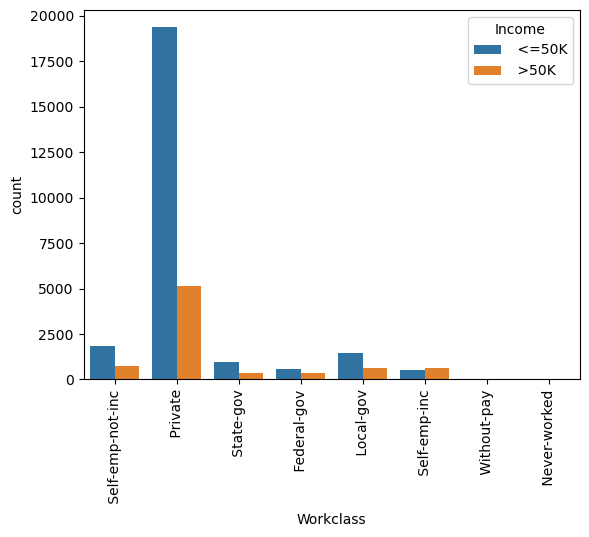

In [37]:
sns.countplot(x='Workclass',hue='Income',data=df)
plt.xticks(rotation=90)

People working  in Private sector jobs are earning more <50k of Income as compared to other people working in other sectors  
People working in wothout pay and Never worked contains hardly any data  
while People working in self employed is the only category having more number of people earning Income>50k



In [38]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Preschool'),
  Text(1, 0, ' 1st-4th'),
  Text(2, 0, ' 5th-6th'),
  Text(3, 0, ' 7th-8th'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' 10th'),
  Text(6, 0, ' 11th'),
  Text(7, 0, ' 12th'),
  Text(8, 0, ' HS-grad'),
  Text(9, 0, ' Some-college'),
  Text(10, 0, ' Bachelors'),
  Text(11, 0, ' Masters'),
  Text(12, 0, ' Doctorate'),
  Text(13, 0, ' Prof-school'),
  Text(14, 0, ' Assoc-acdm'),
  Text(15, 0, ' Assoc-voc')])

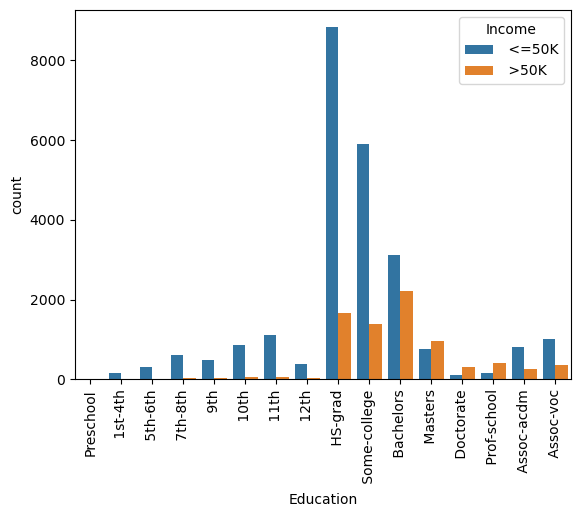

In [39]:
orderlist=['Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Some-college',' Bachelors',
           ' Masters',' Doctorate', ' Prof-school',
           ' Assoc-acdm', ' Assoc-voc',]

sns.countplot(x='Education',hue='Income',data=df,order=orderlist)
plt.xticks(rotation=90)

People who have done Doctrate,Prof school ,Masters   have more no of people earning>50k  
People who have less Education done from preschool to 12th have more no of people earning >50k  
While Assc-admn and Assoc-voc ahve more no of people earning income<50k


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

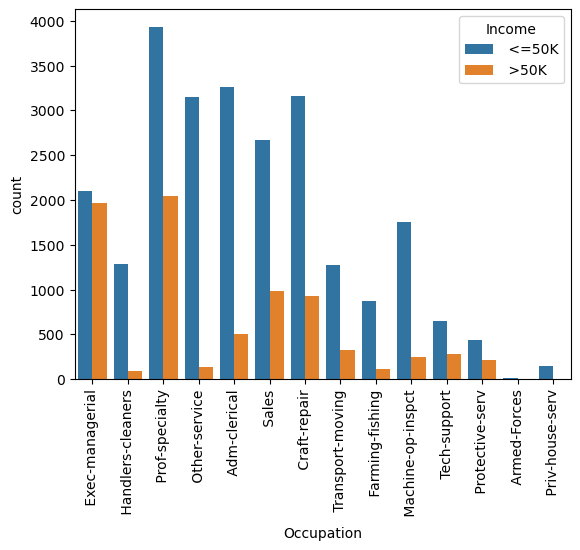

In [40]:
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)

Exec-manager have almost equal no of people earning income >50k and <50k  
People working in  ' Transport-moving',' Farming-fishing',' Machine-op-inspct'  have more no of peopel earning <50k  
While people wroking in ' Armed-Forces', ' Priv-house-serv' only earn <50k
50% people earning in Prof-speciality earn <50k

In [41]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

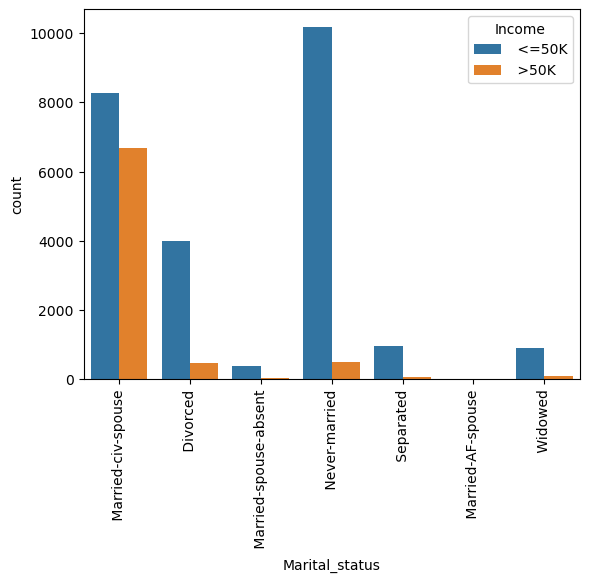

In [42]:
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)

People in married-civ -spouse has almost euql no of people earning both categries of income  
People who are never married ahve comapritively higher ratio of earning<50k

People who are married-spouse absent,seperated,Widowed have were less earnings of >50k

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

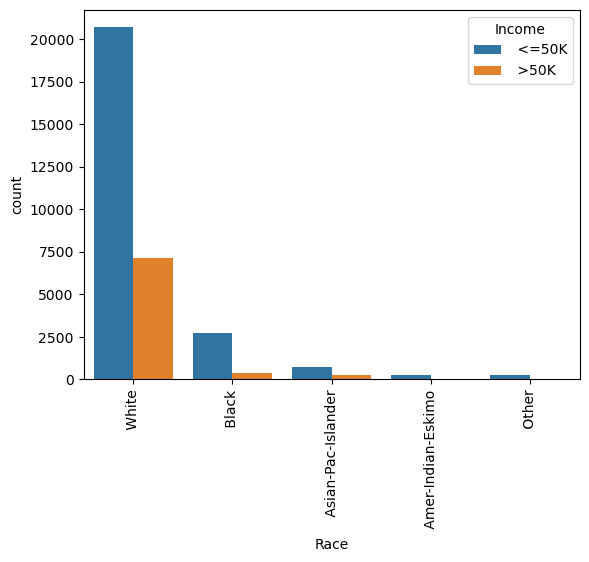

In [43]:
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=90)

People from white race earn highest income>50k  
while people of Amer indian and other race earn only <50k  
While people of black and  Asian-pak have more adults earning <50k


In [44]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [45]:
num

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

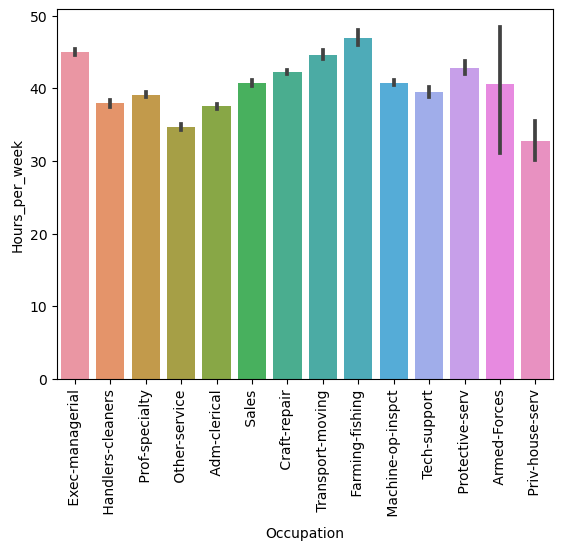

In [46]:
sns.barplot(y='Hours_per_week',x='Occupation',data=df)
plt.xticks(rotation=90)

Frming-fishing people work for more hours  
After that Exec-manager and Transport people work more hours/week  
Least no of hours/week work id done by private-house servants

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

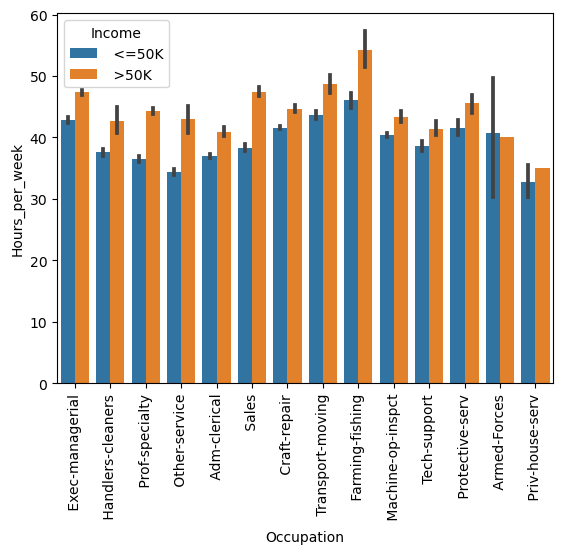

In [47]:
sns.barplot(y='Hours_per_week',x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)

Framing-fishing people work for more hours , have more peopl ewith higher income>50k  
Transport people have more people with higher income>50k

In [48]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income', 'agegroup'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Hours_per_week'>

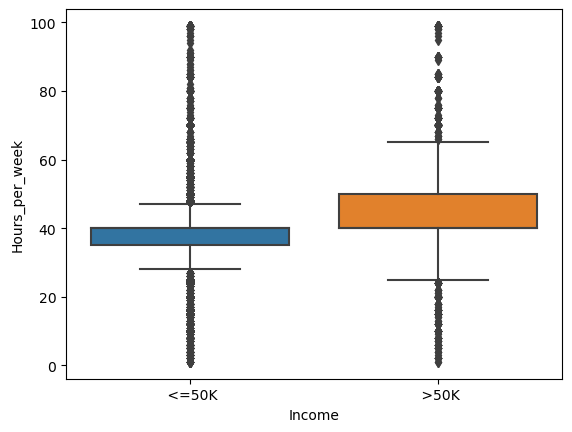

In [49]:
sns.boxplot(x='Income', y='Hours_per_week', data=df)

More the working hours ,more  the income   
Hence,both are linear correlated to each other


<Axes: xlabel='Income', ylabel='Age'>

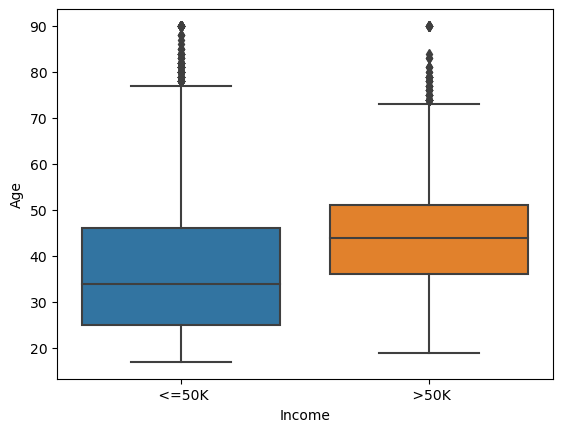

In [50]:
sns.boxplot(x='Income', y='Age', data=df)

Between the age group 35-55 have more income>50k  
while the age group of 25-45 have income<50k  
Also,the large no of people fall in the age group 25-45 ,hence havoing income of <50k is distributed more as compared to >50k

MULTIVARIATE ANALYSIS

In [51]:
num_col= ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
num_col.append('Income')

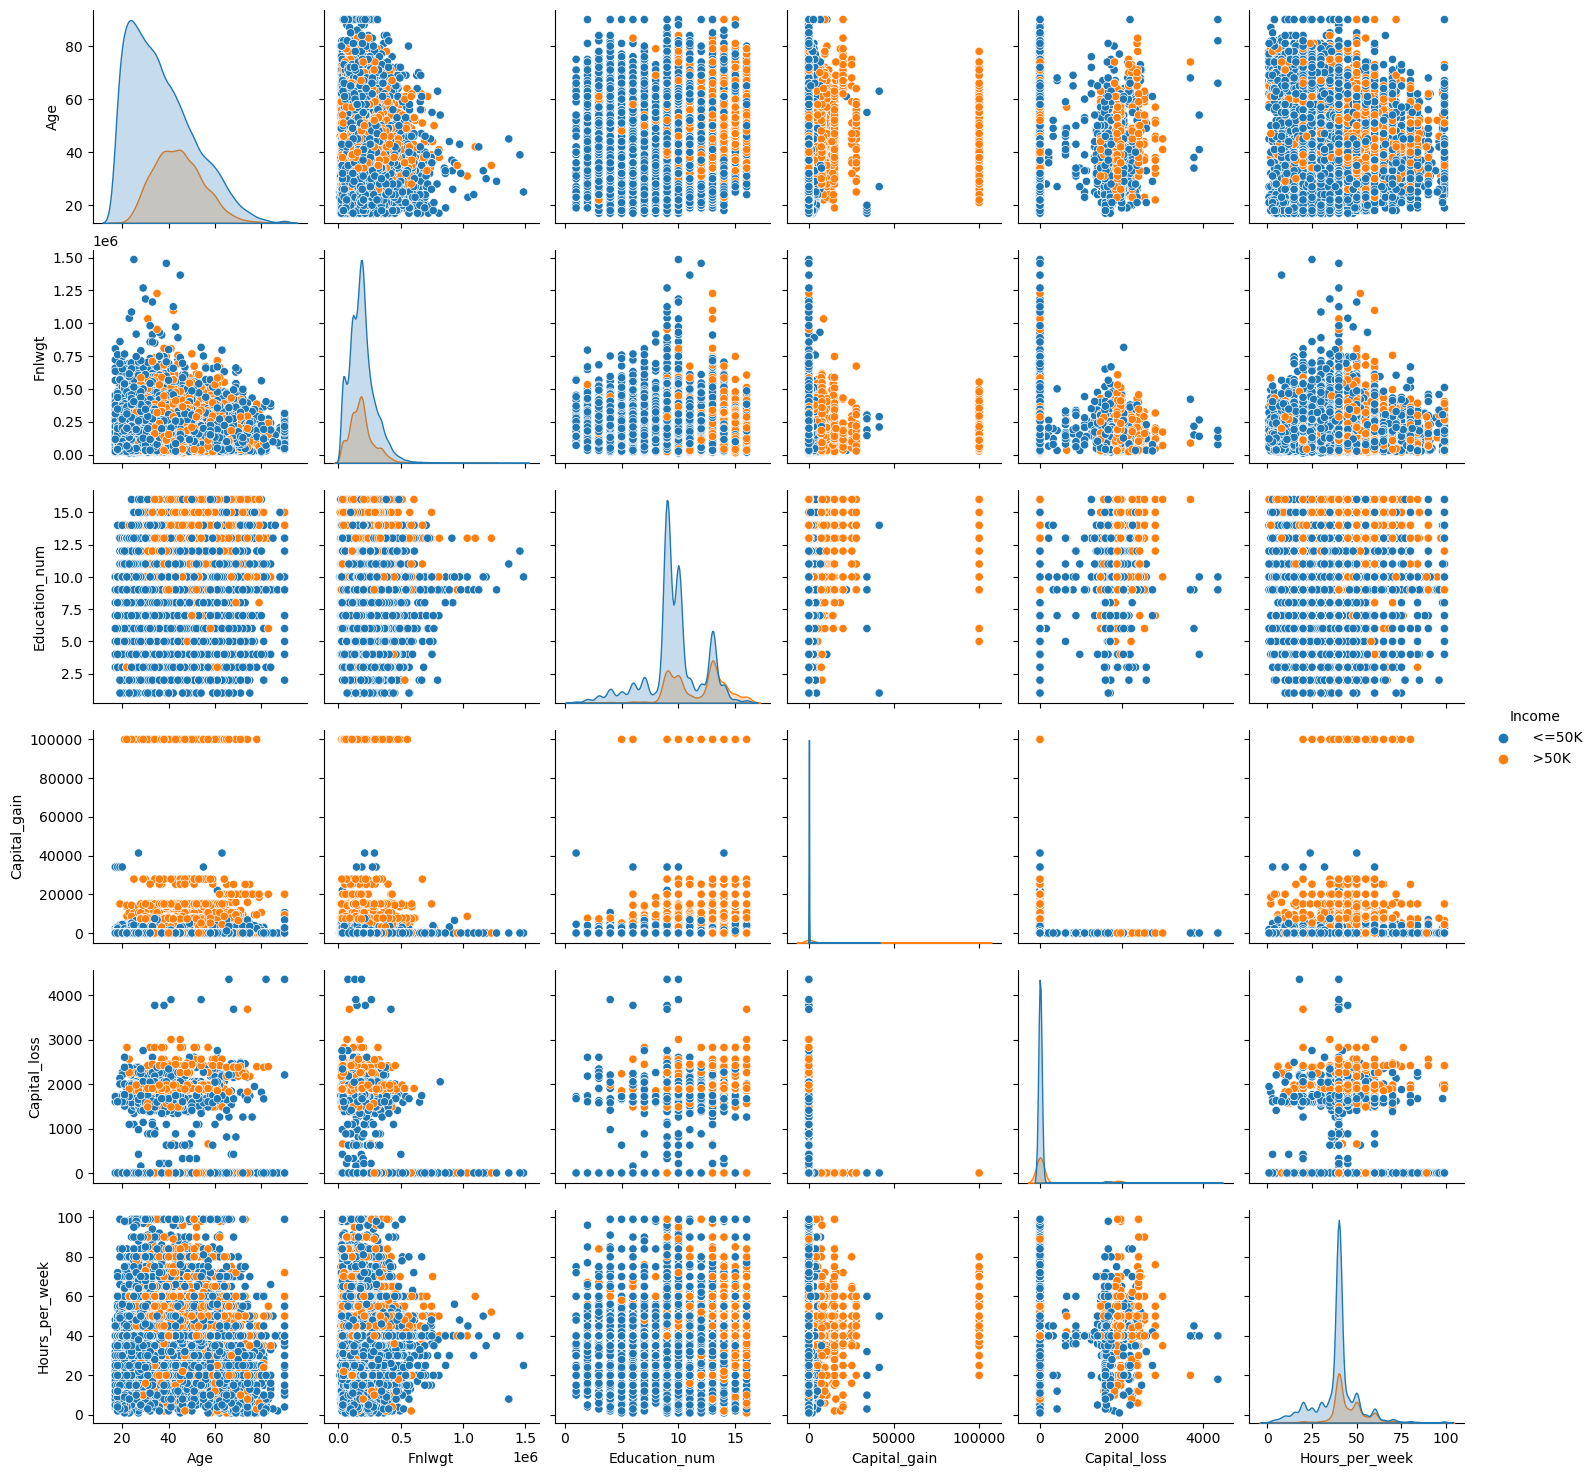

In [52]:
sns.pairplot(df[num_col],hue='Income')

Age vs Income:More the age ,more the income>50k  
Education vs Income: More the years of education more is the income>50k  
Capatial gain vs Income :more the Income ,more the Capital Gain
CapitalLoss: People with more loss ahve more Income
hours/week vs Income:more the hours/week ,more is the income

# FEATURE ENGINEERING

In [53]:
df['Income']=df['Income'].map({' <=50K': 0 ,' >50K': 1})

In [54]:
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int64

# CHECKING OUTLIERS

In [55]:
from scipy.stats import zscore
out=df[num]
z=np.abs(zscore(out))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [56]:
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [57]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(29808, 16)

We notice that almost 2,500 records having outliers  
Hence,outliers are removed

In [58]:
df=df_new

## CHECKING SKEWNESS

In [59]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

We notice that capital gain and capital loss shows highest skewness,Lets handle skewness

In [60]:
df['Capital_gain']=np.log1p(df['Capital_gain'])
df['Capital_loss']=np.log1p(df['Capital_loss'])

In [61]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       3.115925
Capital_loss      25.102455
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

Skewness is remove successfully

LABEL ENCODER

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [63]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,agegroup
0,50,5,83311,8,13,2,3,0,4,1,0.000000,0.0,13,37,0,2
1,38,3,215646,10,9,0,5,1,4,1,0.000000,0.0,40,37,0,1
2,53,3,234721,1,7,2,5,0,2,1,0.000000,0.0,40,37,0,3
3,28,3,338409,8,13,2,9,5,2,0,0.000000,0.0,40,4,0,0
4,37,3,284582,11,14,2,3,5,4,0,0.000000,0.0,40,37,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,6,12,2,12,5,4,0,0.000000,0.0,38,37,0,0
32556,40,3,154374,10,9,2,6,0,4,1,0.000000,0.0,40,37,1,1
32557,58,3,151910,10,9,6,0,4,4,0,0.000000,0.0,40,37,0,3
32558,22,3,201490,10,9,4,0,3,4,1,0.000000,0.0,20,37,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             29808 non-null  int64  
 1   Workclass       29808 non-null  int32  
 2   Fnlwgt          29808 non-null  int64  
 3   Education       29808 non-null  int32  
 4   Education_num   29808 non-null  int64  
 5   Marital_status  29808 non-null  int32  
 6   Occupation      29808 non-null  int32  
 7   Relationship    29808 non-null  int32  
 8   Race            29808 non-null  int32  
 9   Sex             29808 non-null  int32  
 10  Capital_gain    29808 non-null  float64
 11  Capital_loss    29808 non-null  float64
 12  Hours_per_week  29808 non-null  int64  
 13  Native_country  29808 non-null  int32  
 14  Income          29808 non-null  int64  
 15  agegroup        29808 non-null  int32  
dtypes: float64(2), int32(9), int64(5)
memory usage: 2.8 MB


### CORRELATION VALUES

In [65]:
corr=df.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,agegroup
Age,1.000000,0.032951,-0.074430,-0.004661,0.041431,-0.285335,-0.002594,-0.266802,0.027937,0.086589,0.125559,0.020133,0.091817,-0.001640,0.239314,0.847167
Workclass,0.032951,1.000000,-0.022991,0.002653,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.004522,-0.010053,0.027270,-0.001685,-0.007180,0.026198
Fnlwgt,-0.074430,-0.022991,1.000000,-0.023083,-0.037725,0.029000,-0.002200,0.008349,-0.010514,0.028520,-0.005326,0.001033,-0.015489,-0.060659,-0.009160,-0.074082
Education,-0.004661,0.002653,-0.023083,1.000000,0.361097,-0.037416,-0.042764,-0.012924,0.015588,-0.027878,0.020138,-0.000973,0.060787,0.071462,0.074621,-0.130254
Education_num,0.041431,-0.000674,-0.037725,0.361097,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.115786,0.008969,0.150713,0.058248,0.318731,-0.053500
Marital_status,-0.285335,-0.016093,0.029000,-0.037416,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.067434,-0.016557,-0.195162,-0.016736,-0.194355,-0.203963
Occupation,-0.002594,0.008216,-0.002200,-0.042764,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.006878,-0.000597,-0.022743,-0.001708,0.030533,0.020641
Relationship,-0.266802,-0.057609,0.008349,-0.012924,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.086309,0.035504,-0.257798,-0.011165,-0.245913,-0.188563
Race,0.027937,0.045442,-0.010514,0.015588,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.025167,-0.000355,0.045400,0.117269,0.071755,0.035585
Sex,0.086589,0.068831,0.028520,-0.027878,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.067960,-0.032161,0.233755,0.002282,0.209946,0.060835


<Axes: >

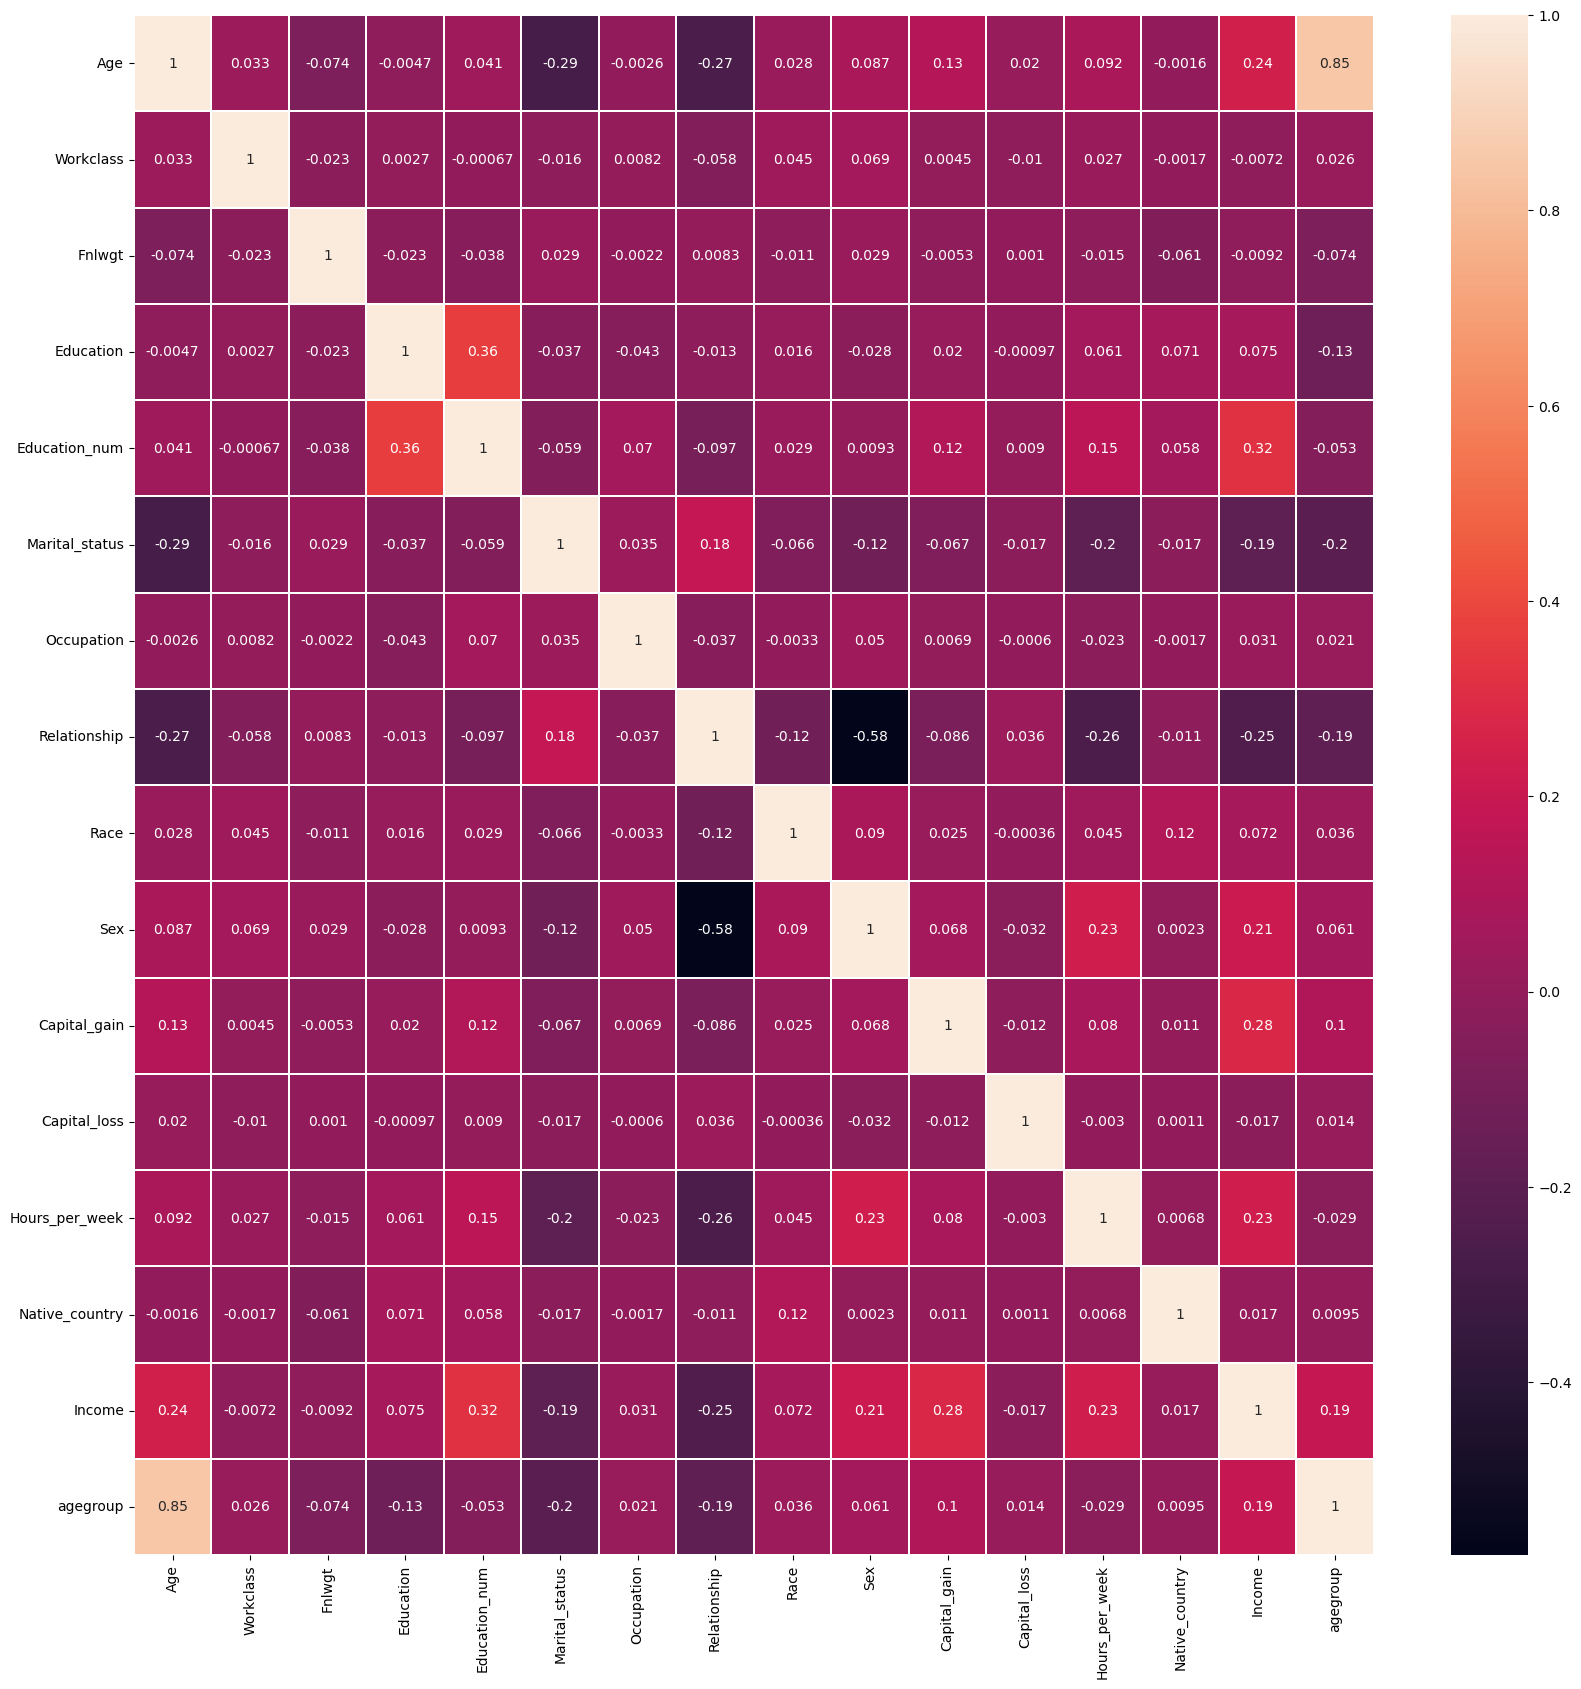

In [66]:
#visualizing using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=0.2)

In [67]:
corr.Income.sort_values(ascending=False)

Income            1.000000
Education_num     0.318731
Capital_gain      0.282585
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
agegroup          0.189065
Education         0.074621
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Workclass        -0.007180
Fnlwgt           -0.009160
Capital_loss     -0.017458
Marital_status   -0.194355
Relationship     -0.245913
Name: Income, dtype: float64

Target variable has poitive correltion with Eductaion,capital gain,Age,..  
Highly negative correlation with Relationship and Marital Status


SEPERTAING TARGET AND INDEPENDENT VARIABLES

In [68]:
x=df.drop('Income',axis=1)
y=df['Income']

FEATURE SCALING INDEPENDENT VARIABLES

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,agegroup
0,0.887304,1.732583,-1.077578,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.295560,-0.040022,-2.415235,0.257250,0.471638
1,-0.011046,-0.078182,0.321940,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.295560,-0.040022,0.009070,0.257250,-0.299160
2,1.111891,-0.078182,0.523669,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.295560,-0.040022,0.009070,0.257250,1.242436
3,-0.759670,-0.078182,1.620229,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.295560,-0.040022,0.009070,-5.413799,-1.069958
4,-0.085908,-0.078182,1.050977,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.295560,-0.040022,0.009070,0.257250,-0.299160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,-0.078182,0.762476,-0.929731,0.783514,-0.410260,1.476848,2.186429,0.393999,-1.396153,-0.295560,-0.040022,-0.170508,0.257250,-1.069958
29804,0.138679,-0.078182,-0.326046,0.249488,-0.439623,-0.410260,-0.028019,-0.919032,0.393999,0.716254,-0.295560,-0.040022,0.009070,0.257250,-0.299160
29805,1.486203,-0.078182,-0.352105,0.249488,-0.439623,2.230572,-1.532886,1.565337,0.393999,-1.396153,-0.295560,-0.040022,0.009070,0.257250,1.242436
29806,-1.208844,-0.078182,0.172232,0.249488,-0.439623,0.910156,-1.532886,0.944244,0.393999,0.716254,-0.295560,-0.040022,-1.786711,0.257250,-1.069958


#### CHECKING VIF VALUES

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

,columns,values
0,Age,4.127130
1,Workclass,1.008004
2,Fnlwgt,1.013365
3,Education,1.207367
4,Education_num,1.213584
5,Marital_status,1.138702
6,Occupation,1.017638
7,Relationship,1.675504
8,Race,1.033881
9,Sex,1.551392


From above Age and agegroup showing multicollinearity with other columns  
Also,Relationship and sex showing high multicollinaerity with other columns 

In [76]:
x.drop(['Age','agegroup','Relationship','Sex'],axis=1,inplace=True)

PCA TO REDUCE  MULTIDIMENSIONALITY

In [77]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
xpca=pca.fit_transform(x)
n_components = pca.n_components_
print(f"Number of components selected: {n_components}")


Number of components selected: 11


In [78]:
xpca.shape

(29808, 11)

In [79]:
pca.explained_variance_ratio_

array([0.13971165, 0.10496471, 0.10045882, 0.0937013 , 0.09131371,
       0.09038985, 0.08951118, 0.08525934, 0.07741484, 0.0726963 ,
       0.05457829])

##### CHECKING WHETHER TARGET IS BaLANCED OR NOT

In [80]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

We observe huge imbalance in data  
Lets handle it using sampling technique

In [81]:
#!pip install imblearn

In [84]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x1,y1=smote.fit_resample(x,y)

In [85]:
y1.shape

(46312,)

In [86]:
y1.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

In [87]:
x,y=x1,y1

As the target has 2 unique values where 0 represents <50k and 1 represent >50k  
Hence considering this problem as Classification problem

# MACHINE LEARNING

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [89]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
bc=BaggingClassifier()
abc=AdaBoostClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()

models=[lr,rfc,etc,bc,abc,knn,svc,gnb]

CHHOSING RANDOM STATE

In [92]:
maxacc=0
maxrs=0

for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=accuracy_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Max accuracy',maxacc,'at random state',i)

Max accuracy 0.7216064488268318 at random state 199


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=199,test_size=0.30)

##### ACCURACY SCORE FOR ALL MODELS

In [95]:
for m in models:
    print('For',m)
    m.fit(x_train,y_train)
    ypred=m.predict(x_test)
    acc=accuracy_score(y_test,ypred)
    print('Acuracy',acc)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    print("-"*60)

For LogisticRegression()
Acuracy 0.7152727796171009
[[5069 1862]
 [2094 4869]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6931
           1       0.72      0.70      0.71      6963

    accuracy                           0.72     13894
   macro avg       0.72      0.72      0.72     13894
weighted avg       0.72      0.72      0.72     13894

------------------------------------------------------------
For RandomForestClassifier()
Acuracy 0.872822801209155
[[6010  921]
 [ 846 6117]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6931
           1       0.87      0.88      0.87      6963

    accuracy                           0.87     13894
   macro avg       0.87      0.87      0.87     13894
weighted avg       0.87      0.87      0.87     13894

------------------------------------------------------------
For ExtraTreesClassifier()
Acuracy 0.871671224989204
[[5973  95

Accuracy score for random Forest and ExtraTress is highest  
lets check cross val score for further finalizing the model

###### CROSS VAL SCORE

In [97]:
for c in models:
    print('for',c)
    score=cross_val_score(c,x,y,cv=5)
    print(score.mean())
    print("-"*60)

for LogisticRegression()
0.7135301428052478
------------------------------------------------------------
for RandomForestClassifier()
0.8755416311270408
------------------------------------------------------------
for ExtraTreesClassifier()
0.8793631612949293
------------------------------------------------------------
for BaggingClassifier()
0.8631258635083009
------------------------------------------------------------
for AdaBoostClassifier()
0.8308652644862677
------------------------------------------------------------
for KNeighborsClassifier()
0.8422875186496347
------------------------------------------------------------
for SVC()
0.8150805746039819
------------------------------------------------------------
for GaussianNB()
0.7814174843607191
------------------------------------------------------------


###### CHOOSING EXTRATREES AS THE BEST MODEL FOR PREDICTION

HYPERPARAMETER TUNING THE EXTRATREES

In [98]:
parameters={'n_estimators':[100,200,300],
           'max_depth': [5, 10, 20],
           'criterion':['gini','entropy']}
gcv=GridSearchCV(etc,parameters,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}

BUILDING AGAIN MODEL WITH BEST PARAMETERS

In [102]:
etcmodel=ExtraTreesClassifier(criterion='gini', max_depth= 20, n_estimators= 100)
etcmodel.fit(x_train,y_train)
ypred=etcmodel.predict(x_test)
acc=accuracy_score(y_test,ypred)
print('Acuracy',acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Acuracy 0.8631783503670649
[[5521 1410]
 [ 491 6472]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      6931
           1       0.82      0.93      0.87      6963

    accuracy                           0.86     13894
   macro avg       0.87      0.86      0.86     13894
weighted avg       0.87      0.86      0.86     13894



SAVING THE MODEL

In [105]:
import joblib
joblib.dump(etcmodel,'Census Income.pkl')

['Census Income.pkl']

In [106]:
model=joblib.load('Census Income.pkl')
model

ExtraTreesClassifier(max_depth=20)

In [107]:
#predicting the values
df2=pd.DataFrame()
df2['Actual values']=np.array(y_test)
df2['Predicted values']=model.predict(x_test)
df2

,Actual values,Predicted values
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
13889,1,1
13890,1,1
13891,0,0
13892,0,0
